1. Location Analysis
    * State
    * City
    * Latitude * Longitude, Zipcode, Street
2. Time Analysis
    * Year, Month, Day of Week, Hour 
3. Weather Analysis
4. Road Condition

### Data Preparation and Cleaning

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
import seaborn as sns
import folium

sns.set_style('darkgrid')

Load dataset

In [2]:
us_accidents_df = pd.read_csv(r"C:\Users\RonaldOnyango\Desktop\Misc\US_Accidents_Dec21_updated.csv")

In [3]:
us_accidents_df.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                    At Dart Ave/Exit 21 - Accident.  ...       False   False   
4                 At Mitchell Ave/Exit 6 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night               Day                   Day  
4            Day               Day                   Day  

[5 rows x 47 columns]

In [4]:
us_accidents_df.tail()

ID  Severity           Start_Time             End_Time  \
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat  Start_Lng   End_Lat    End_Lng  Distance(mi)  \
2845337   34.00248 -117.37936  33.99888 -117.37094         0.543   
2845338   32.76696 -117.14806  32.76555 -117.15363         0.338   
2845339   33.77545 -117.84779  33.77740 -117.85727         0.561   
2845340   33.99246 -118.40302  33.98311 -118.39565         0.772   
2845341   34.13393 -117.23092  34.13736 -117.23934         0.537   

                                               Description  ...  Roundabout  \
2845337                           At Market St - Accident.  ...       False   
2845338    At Camino Del Rio/Mission Center Rd - Accident.  ...       False   
2845339  At Glassell St/Grand Ave - Accident. in the ri...  ...       False   
2845340     At CA-90/Marina Fwy/Jefferson Blvd - Accident.  ...       False   
2845341              At Highland Ave/Arden Ave - Accident.  ...       False   

        Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
2845337   False  False           False          False        False   
2845338   False  False           False          False        False   
2845339   False  False           False          False        False   
2845340   False  False           False          False        False   
2845341   False  False           False          False        False   

        Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
2845337            Day            Day               Day                   Day  
2845338            Day            Day               Day                   Day  
2845339            Day            Day               Day                   Day  
2845340            Day            Day               Day                   Day  
2845341            Day            Day               Day                   Day  

[5 rows x 47 columns]

In [5]:
us_accidents_df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06   
mean   2.137572e+00  3.624520e+01 -9.711463e+01  3.624532e+01 -9.711439e+01   
std    4.787216e-01  5.363797e+00  1.831782e+01  5.363873e+00  1.831763e+01   
min    1.000000e+00  2.456603e+01 -1.245481e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.344517e+01 -1.180331e+02  3.344628e+01 -1.180333e+02   
50%    2.000000e+00  3.609861e+01 -9.241808e+01  3.609799e+01 -9.241772e+01   
75%    2.000000e+00  4.016024e+01 -8.037243e+01  4.016105e+01 -8.037338e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  2.845342e+06  1.101431e+06    2.776068e+06   2.375699e+06   
mean   7.026779e-01  8.089408e+03    6.179356e+01   5.965823e+01   
std    1.560361e+00  1.836009e+04    1.862263e+01   2.116097e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    5.200000e-02  1.270000e+03    5.000000e+01   4.600000e+01   
50%    2.440000e-01  4.007000e+03    6.400000e+01   6.300000e+01   
75%    7.640000e-01  9.567000e+03    7.600000e+01   7.600000e+01   
max    1.551860e+02  9.999997e+06    1.960000e+02   1.960000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  2.772250e+06  2.786142e+06    2.774796e+06     2.687398e+06   
mean   6.436545e+01  2.947234e+01    9.099391e+00     7.395044e+00   
std    2.287457e+01  1.045286e+00    2.717546e+00     5.527454e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.931000e+01    1.000000e+01     3.500000e+00   
50%    6.700000e+01  2.982000e+01    1.000000e+01     7.000000e+00   
75%    8.300000e+01  3.001000e+01    1.000000e+01     1.000000e+01   
max    1.000000e+02  5.890000e+01    1.400000e+02     1.087000e+03   

       Precipitation(in)  
count       2.295884e+06  
mean        7.016940e-03  
std         9.348831e-02  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

In [6]:
us_accidents_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Find the correlation between different columns and plot a heatmap. Start latitude and end longitude have a high correlation. Traffic calming and Bump also have a high correlation of 0.77

In [7]:
us_accidents_df.corr()

Severity  Start_Lat  Start_Lng   End_Lat   End_Lng  \
Severity           1.000000   0.089207   0.114063  0.089209  0.114064   
Start_Lat          0.089207   1.000000  -0.154965  0.999995 -0.154962   
Start_Lng          0.114063  -0.154965   1.000000 -0.154956  0.999999   
End_Lat            0.089209   0.999995  -0.154956  1.000000 -0.154953   
End_Lng            0.114064  -0.154962   0.999999 -0.154953  1.000000   
Distance(mi)       0.092140   0.071588   0.039861  0.071593  0.039830   
Number            -0.000689   0.101281  -0.170566  0.101270 -0.170563   
Temperature(F)    -0.045335  -0.475065   0.032159 -0.475058  0.032163   
Wind_Chill(F)     -0.097459  -0.505567   0.010849 -0.505561  0.010852   
Humidity(%)        0.037802   0.005876   0.170909  0.005869  0.170904   
Pressure(in)       0.043883  -0.234889   0.208828 -0.234896  0.208830   
Visibility(mi)     0.007371  -0.086538   0.029336 -0.086532  0.029338   
Wind_Speed(mph)    0.048382   0.029158   0.090564  0.029162  0.090567   
Precipitation(in)  0.013845  -0.002835   0.024094 -0.002836  0.024094   
Amenity           -0.003940  -0.005879   0.014923 -0.005878  0.014924   
Bump              -0.003739   0.000338  -0.014867  0.000339 -0.014867   
Crossing          -0.035382  -0.094698   0.056169 -0.094703  0.056165   
Give_Way           0.008141   0.007851   0.018110  0.007840  0.018110   
Junction           0.045928   0.043628  -0.017202  0.043621 -0.017199   
No_Exit           -0.002359  -0.017348   0.006220 -0.017347  0.006220   
Railway           -0.001747   0.003184  -0.015450  0.003184 -0.015449   
Roundabout        -0.000773  -0.003366   0.000450 -0.003366  0.000450   
Station           -0.018017  -0.107697   0.038533 -0.107696  0.038533   
Stop              -0.002536   0.010817  -0.040265  0.010827 -0.040264   
Traffic_Calming   -0.003009  -0.003164  -0.007750 -0.003163 -0.007750   
Traffic_Signal    -0.012798  -0.058208   0.059568 -0.058210  0.059566   
Turning_Loop            NaN        NaN        NaN       NaN       NaN   

                   Distance(mi)    Number  Temperature(F)  Wind_Chill(F)  \
Severity               0.092140 -0.000689       -0.045335      -0.097459   
Start_Lat              0.071588  0.101281       -0.475065      -0.505567   
Start_Lng              0.039861 -0.170566        0.032159       0.010849   
End_Lat                0.071593  0.101270       -0.475058      -0.505561   
End_Lng                0.039830 -0.170563        0.032163       0.010852   
Distance(mi)           1.000000  0.067331       -0.051212      -0.060094   
Number                 0.067331  1.000000       -0.051146      -0.049400   
Temperature(F)        -0.051212 -0.051146        1.000000       0.993857   
Wind_Chill(F)         -0.060094 -0.049400        0.993857       1.000000   
Humidity(%)            0.026860  0.015825       -0.366527      -0.346028   
Pressure(in)          -0.069115 -0.058449        0.137756       0.134312   
Visibility(mi)        -0.034001 -0.018511        0.211134       0.217573   
Wind_Speed(mph)        0.011127  0.013933        0.078788       0.013011   
Precipitation(in)      0.003050 -0.000188       -0.004425      -0.008289   
Amenity               -0.032717 -0.032279        0.013420       0.016908   
Bump                  -0.005408 -0.003719        0.003967       0.005370   
Crossing              -0.091256 -0.054667        0.069728       0.077446   
Give_Way              -0.006655 -0.003792       -0.005524      -0.007584   
Junction               0.022442 -0.010801       -0.020358      -0.048784   
No_Exit               -0.010184 -0.005052        0.011610       0.012066   
Railway               -0.021462 -0.013668        0.003108       0.005062   
Roundabout            -0.002491 -0.001360        0.002122       0.002466   
Station               -0.052826 -0.028485        0.061248       0.069379   
Stop                  -0.027108 -0.003688        0.000021       0.005424   
Traffic_Calming       -0.007322 -0.005075        0.005672       0.007140  

Text(0.5, 1.0, 'Correlation Heatmap')

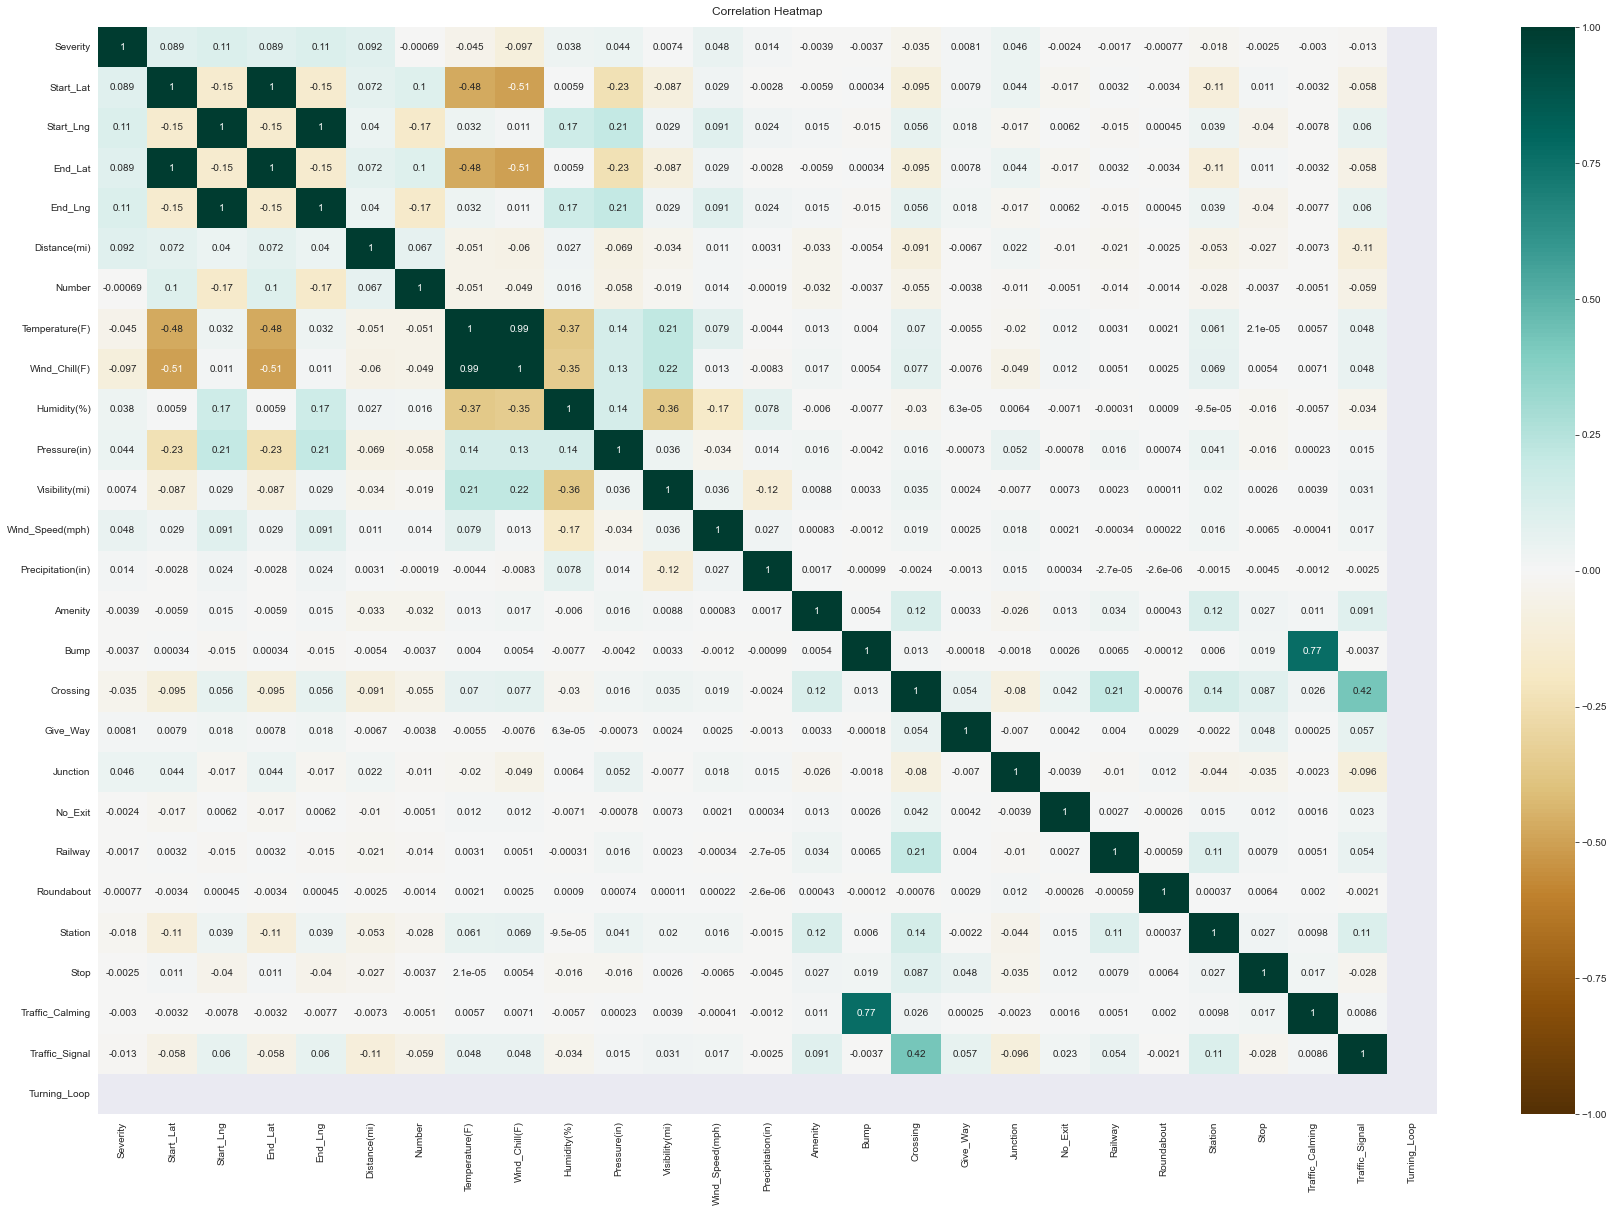

In [8]:
plt.figure(figsize=(30,20))
heatmap = sns.heatmap(us_accidents_df.corr(), vmin=-1, vmax= 1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [9]:
us_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [10]:
us_accidents_df['Start_Time'] = pd.to_datetime(us_accidents_df['Start_Time'])
us_accidents_df['End_Time'] = pd.to_datetime(us_accidents_df['End_Time'])
us_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               datetime64[ns]
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

In [11]:
missing_percentages = us_accidents_df.isna().sum().sort_values(ascending=False) / len(us_accidents_df)
missing_percentages

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

<AxesSubplot:>

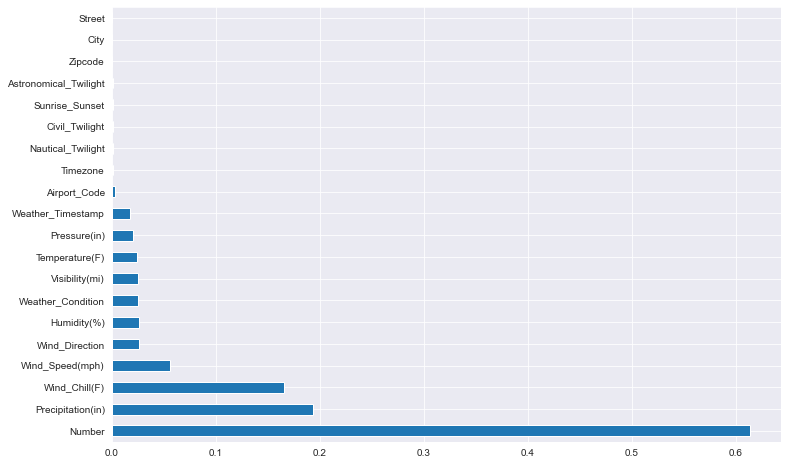

In [12]:
plt.figure(figsize=(12,8))
missing_percentages[missing_percentages!=0].plot(kind='barh')

In [13]:
us_accidents_df['Number'].value_counts()

1.0        10662
2.0         8747
101.0       6706
100.0       6187
198.0       2617
           ...  
42163.0        1
77683.0        1
36887.0        1
45105.0        1
68630.0        1
Name: Number, Length: 46402, dtype: int64

I'll start by analyzing a number of columns in order of priority:
* City
* Start Time, End Time
* Start Longitude, End Longitude
* Temperature
* Weather condition
* Temperature
* Visibility
* Pressure
* Wind speed
* Precipitation

View accidents by cities. Choose the top twenty cities with highest accident counts. 

### Accidents by Location

In [14]:
accidents_by_city = us_accidents_df.City.value_counts()
accidents_by_city[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

<AxesSubplot:>

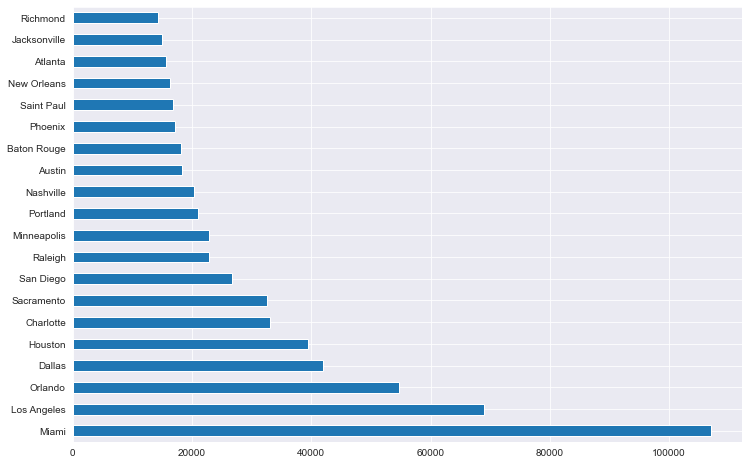

In [15]:
plt.figure(figsize=(12,8))
accidents_by_city[:20].plot(kind='barh')

In [206]:
accidents_by_city[:20] * 100 / accidents_by_city.sum()

Miami           3.759518
Los Angeles     2.423586
Orlando         1.922217
Dallas          1.475430
Houston         1.386473
Charlotte       1.165188
Sacramento      1.144346
San Diego       0.935855
Raleigh         0.802754
Minneapolis     0.800224
Portland        0.736116
Nashville       0.712321
Austin          0.643223
Baton Rouge     0.639040
Phoenix         0.602522
Saint Paul      0.592892
New Orleans     0.571171
Atlanta         0.549064
Jacksonville    0.526043
Richmond        0.504322
Name: City, dtype: float64

Miami and Los Angeles have the highest percentage of accidents in the US, accounting for 3.76% and 2.42% of the total accidents respectively.

In [69]:
lowest_accidents_by_city = accidents_by_city[accidents_by_city == 1].value_counts()
lowest_accidents_by_city

1    1110
Name: City, dtype: int64

In [70]:
 accidents_by_city.value_counts()

1       1110
2        819
3        610
4        490
5        370
        ... 
1129       1
1128       1
1124       1
1120       1
691        1
Name: City, Length: 1224, dtype: int64

In [73]:
us_accidents_df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [16]:
'New York' in us_accidents_df.City.unique()

True

Check whether New York is captured in the data. New York is one of the most populated cities in the world, but does not appear in the top 20 cities with high accident counts. 

Find cities with accidents equal to or greater than 1000 and assign the variable high_accident_cities, and cities with accidents less than 1000 and assign the variable low_accident_cities. 4% of the cities have accidents greater than or equal to 1000 while 96% have accidents less than 1000.
Only 1110 cities out of the total had only 1 accident in the reported period

In [17]:
high_accident_cities =accidents_by_city[accidents_by_city >= 1000]
low_accident_cities = accidents_by_city[accidents_by_city < 1000]

In [18]:
len(high_accident_cities) * 100 / len(accidents_by_city)

4.246211796935194

In [19]:
len(low_accident_cities) * 100 / len(accidents_by_city)

95.7537882030648

C:\Users\RonaldOnyango\AppData\Local\Temp\ipykernel_51488\2300038171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accident_cities, kde=True,)


<AxesSubplot:xlabel='City', ylabel='Density'>

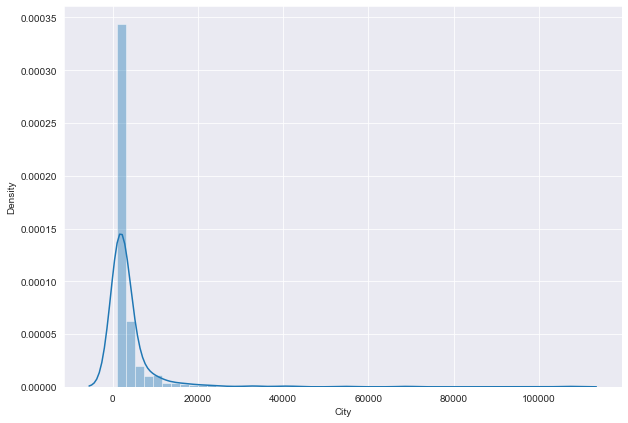

In [20]:
plt.figure(figsize=(10,7))

sns.distplot(high_accident_cities, kde=True,)

C:\Users\RonaldOnyango\AppData\Local\Temp\ipykernel_51488\469555131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low_accident_cities)


<AxesSubplot:xlabel='City', ylabel='Density'>

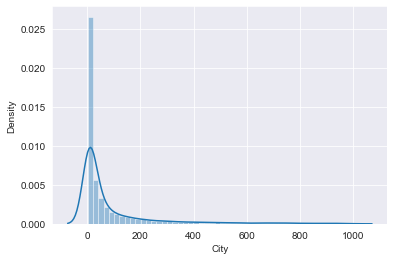

In [21]:
sns.distplot(low_accident_cities)

<AxesSubplot:xlabel='City', ylabel='Count'>

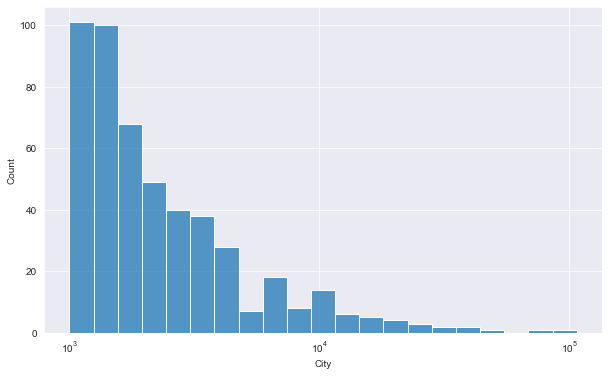

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(high_accident_cities, log_scale=True)

Number of frequency of accidents decreases exponentially for cities with high accident rates.

Text(0.5, 1.0, 'Low Accident Cities')

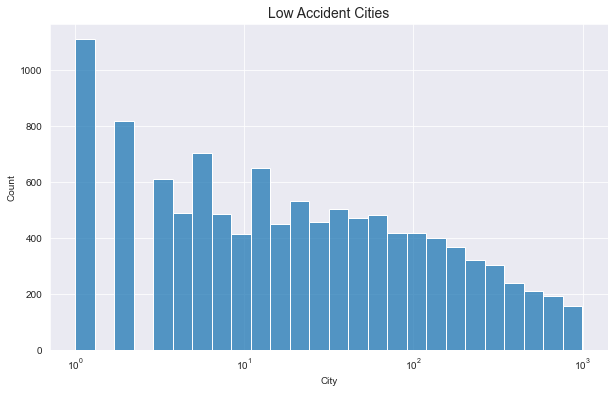

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(low_accident_cities, log_scale=True)
plt.title('Low Accident Cities', fontsize = 14)

In [77]:
us_accidents_df.State.unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

Text(0.5, 1.0, 'Top 20 Accidents by State')

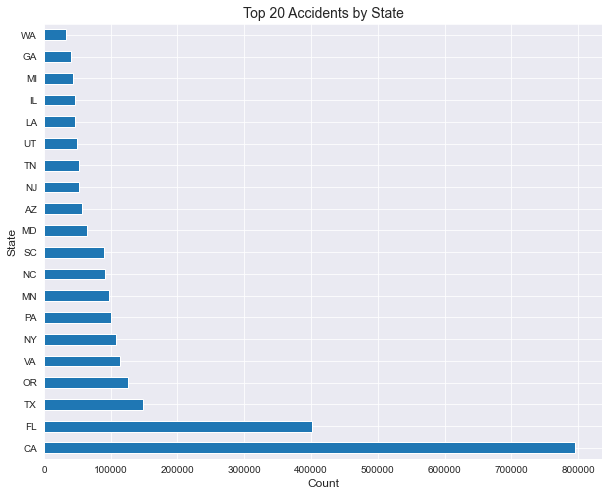

In [75]:
accidents_by_state = us_accidents_df.State.value_counts()

top20_accidents_by_state = accidents_by_state[:20]
plt.figure(figsize=(10,8))
top20_accidents_by_state.plot(kind = 'barh')
plt.xlabel("Count", fontsize = 12)
plt.ylabel("State", fontsize = 12)
plt.xticks(rotation=0)
# plt.xlim(0, )
plt.title("Top 20 Accidents by State", fontsize = 14)

In [209]:
top20_accidents_by_state * 100 / accidents_by_state.sum()

CA    27.970908
FL    14.106846
TX     5.237929
OR     4.440275
VA     3.990206
NY     3.797399
PA     3.513637
MN     3.415582
NC     3.210932
SC     3.135511
MD     2.287423
AZ     1.985842
NJ     1.859249
TN     1.849092
UT     1.728896
LA     1.659976
IL     1.655513
MI     1.540869
GA     1.408829
WA     1.144116
Name: State, dtype: float64

The states of Carlifornia and Florida have the highest frequecny of accidents, accounting for 28% and 14% of the total respectively. Texas, the largest state does not have the highest percentage of accidents as I would have expected.

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

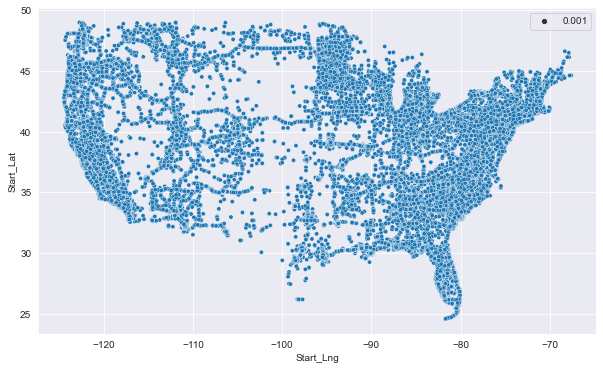

In [88]:
plt.figure(figsize=(10,6))
accidents_map = us_accidents_df.sample(int(0.1*len(us_accidents_df)))

sns.scatterplot(x=accidents_map.Start_Lng, y=accidents_map.Start_Lat, size=0.001)

The density of accidents is higher in the West Coast than the East Coast. The States in the Central region from the map have lower accident counts

In [83]:
lat, lng = us_accidents_df.Start_Lat[0], us_accidents_df.Start_Lng[0]
lat, lng

(40.10891, -83.09286)

In [85]:
sample_df = us_accidents_df.sample(int(0.1*len(us_accidents_df)))
lat_lng_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [89]:
from folium import plugins
from folium.plugins import HeatMap

map = folium.Map()
HeatMap(lat_lng_pairs).add_to(map)
map

In [120]:
us_accidents_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Text(0, 0.5, 'County')

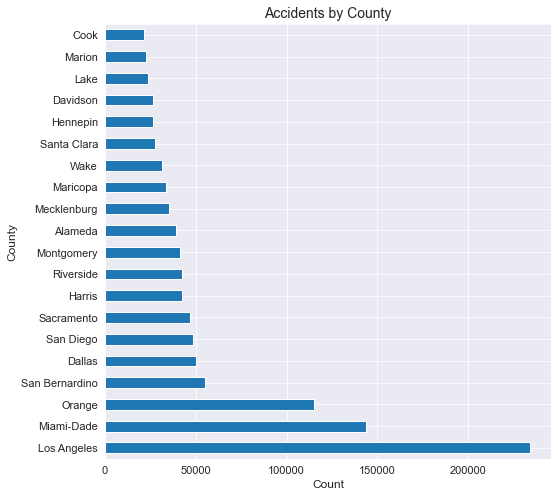

In [136]:
accidents_by_county = us_accidents_df.County.value_counts()
accidents_by_county[:20].plot(kind='barh', figsize=(8,8), fontsize=11)
plt.title('Accidents by County', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('County', fontsize=12)

In [211]:
accidents_by_county[:20]  * 100 / accidents_by_county.sum()

Los Angeles       8.228255
Miami-Dade        5.058759
Orange            4.038776
San Bernardino    1.933616
Dallas            1.759015
San Diego         1.699831
Sacramento        1.641560
Harris            1.495743
Riverside         1.482282
Montgomery        1.457681
Alameda           1.370556
Mecklenburg       1.236793
Maricopa          1.178734
Wake              1.112766
Santa Clara       0.963505
Hennepin          0.933455
Davidson          0.922877
Lake              0.828863
Marion            0.788552
Cook              0.749822
Name: County, dtype: float64

Los Angels and Miami-Dade have significantly high accident acounts. Los Angeles county accounts for 8% of the total accidents and Miami-Dade accounts for 5% of the total accidents in the counties.

Text(0, 0.5, 'Zipcode')

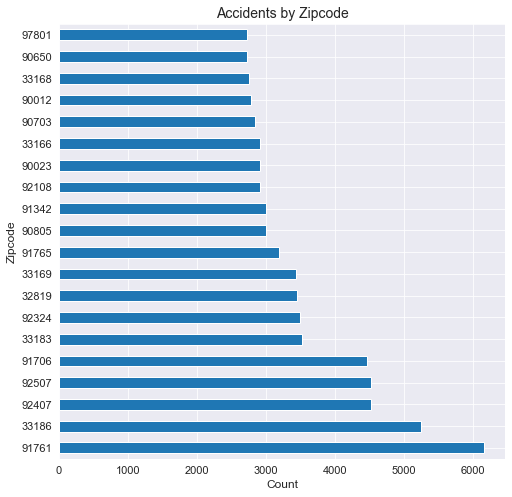

In [137]:
accidents_by_zipcode = us_accidents_df.Zipcode.value_counts()
accidents_by_zipcode[:20].plot(kind='barh', figsize=(8,8), fontsize=11)
plt.title('Accidents by Zipcode', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Zipcode', fontsize=12)

Text(0, 0.5, 'Street')

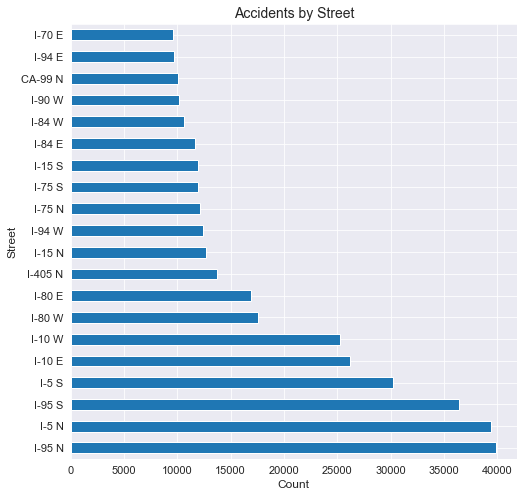

In [139]:
accidents_by_street = us_accidents_df.Street.value_counts()
accidents_by_street[:20].plot(kind='barh', figsize=(8,8), fontsize=11)
plt.title('Accidents by Street', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Street', fontsize=12)

Streets I-95 S, I-5 N and I-95 N have the highest frequency of accidents in relation to the other streets

### Accidents Time

I will look at accidents by time of day, week day, month and year. This will give an insight on what time of the day most accidents occur, what day of the week, what month and in which year did most accidents occur. This can be used to predict and prevent accidents.

Text(0, 0.5, 'Timezone')

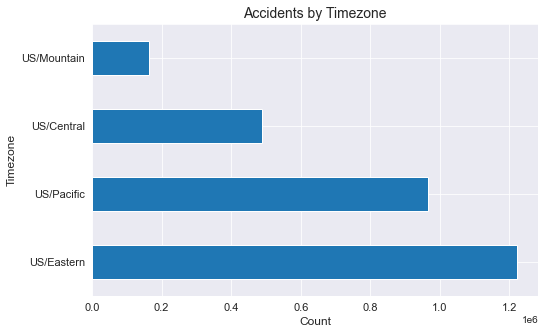

In [119]:
accidents_by_timezone = us_accidents_df.Timezone.value_counts()
accidents_by_timezone.plot(kind='barh', figsize=(8,5), fontsize =11)
plt.title('Accidents by Timezone', fontsize = 14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Timezone', fontsize=12)

In [212]:
accidents_by_timezone * 100 / accidents_by_timezone.sum()

US/Eastern     43.000116
US/Pacific     34.032438
US/Central     17.175209
US/Mountain     5.792237
Name: Timezone, dtype: float64

Eastern Timezone Pacific Timezone have the highest accidents percentage, 43.0% and 34.0% respectively, in the US. Mountain timezone has the lowest percentage of accidents, 5.8% in the US.

In [24]:
start_time = us_accidents_df.Start_Time.value_counts()
start_time[:20]

2021-01-26 16:16:13    252
2021-01-26 16:17:33    170
2021-02-16 06:42:43    157
2021-05-03 06:29:42    111
2021-11-21 18:37:51    102
2021-02-16 06:43:35     97
2021-04-26 08:58:47     95
2021-04-14 13:51:30     92
2020-12-16 13:53:25     82
2021-05-03 06:30:28     75
2021-12-07 14:16:30     72
2021-12-14 10:39:00     71
2021-03-22 06:30:42     71
2021-03-15 06:25:17     70
2021-02-10 14:26:11     69
2021-12-16 14:11:00     63
2020-10-12 11:13:30     62
2020-09-30 12:41:30     61
2021-05-03 06:31:30     60
2017-05-15 09:22:55     59
Name: Start_Time, dtype: int64

Text(0.5, 1.0, 'Accidents by Time')

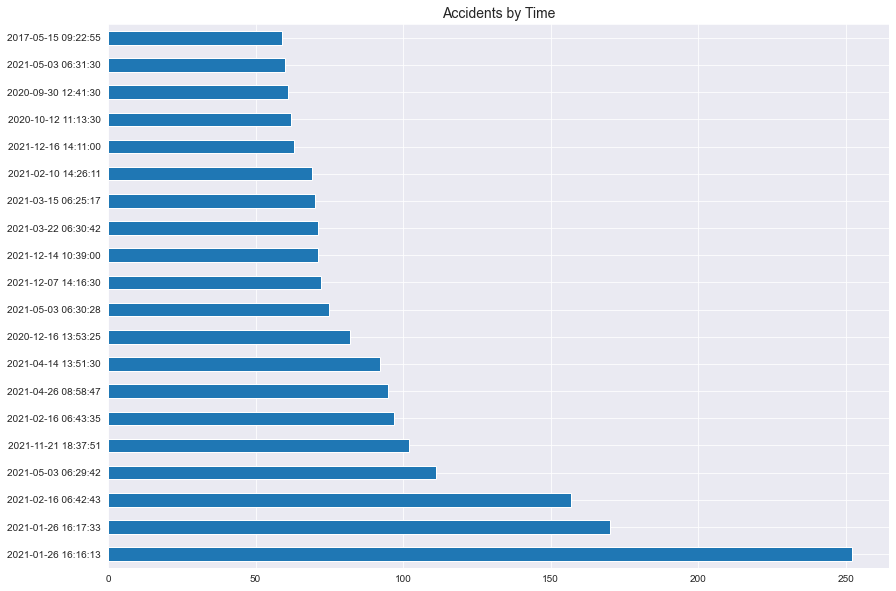

In [25]:
plt.figure(figsize=(14,10))
start_time[:20].plot(kind='barh')
plt.title('Accidents by Time', fontsize = 14)

In [26]:
us_accidents_df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

Text(0, 0.5, 'Count')

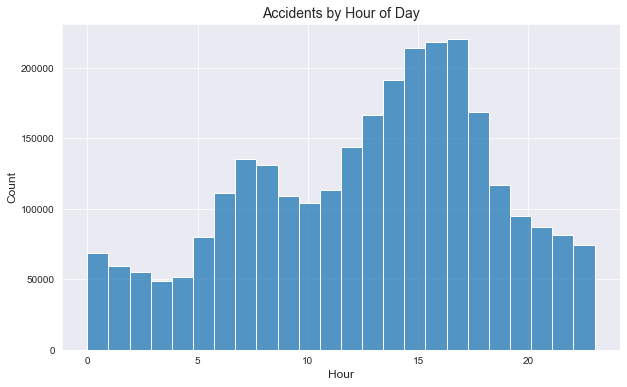

In [27]:
plt.figure(figsize=(10,6))
ax = sns.histplot(us_accidents_df.Start_Time.dt.hour, bins=24, kde=False)
plt.title('Accidents by Hour of Day', fontsize = 14)
plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

Highest percentage of accidents seem to occur between 6am and 9am, and between 3pm and 6pm. These seem to be rush hours when people are going to work and coming back from work. Around 1pm could be because people are heading to and from lunch.

Text(0, 0.5, 'Count')

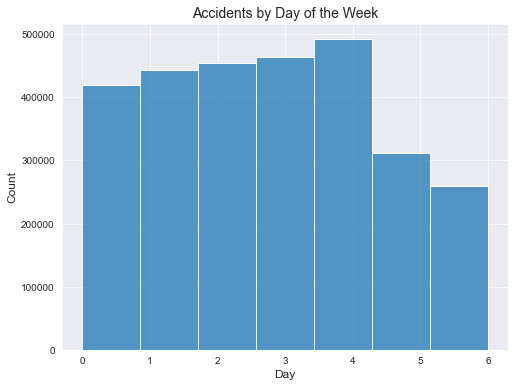

In [28]:
plt.figure(figsize=(8,6))
ax = sns.histplot(us_accidents_df.Start_Time.dt.day_of_week, bins=7, kde=False)
plt.title('Accidents by Day of the Week', fontsize = 14)
plt.xlabel('Day', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

Accident acount increases between Day 1 and Day 5 of the week. This could be because of people going to work on week days. On Friday, accidents seems to be the highest, which can be attributed to drunk drivers. 
Saturday and Sunday have fewer accidents, as most people are at home. Sunday is the lowest.

**Is the distribution of accidents on weekdays same as on weekdays?**

We will compare Monday and Sunday

Text(0, 0.5, 'Count')

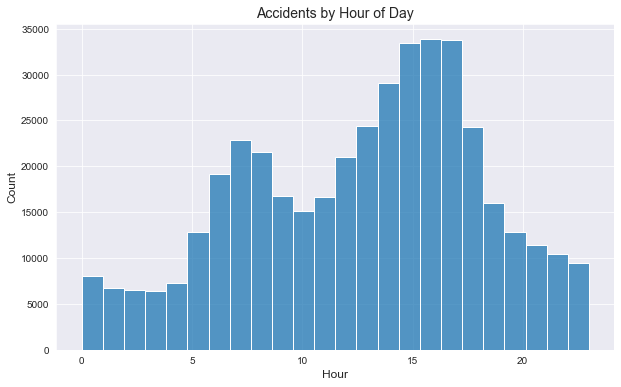

In [29]:
mondays_start_time = us_accidents_df.Start_Time[us_accidents_df.Start_Time .dt.day_of_week == 0]

plt.figure(figsize=(10,6))
sns.histplot(mondays_start_time.dt.hour,bins=24)
plt.title('Accidents by Hour of Day', fontsize = 14)
plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

Text(0, 0.5, 'Count')

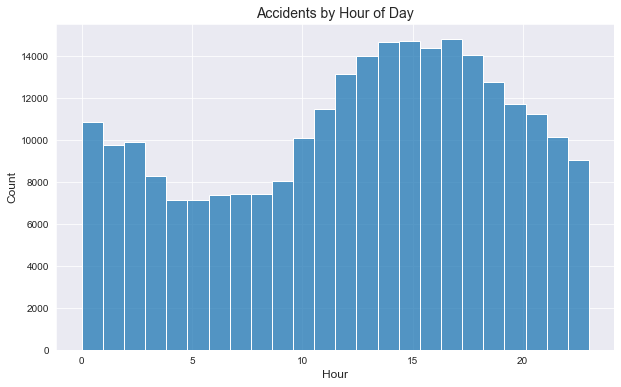

In [30]:
sundays_start_time = us_accidents_df.Start_Time[us_accidents_df.Start_Time .dt.day_of_week == 6]

plt.figure(figsize=(10,6))
sns.histplot(sundays_start_time.dt.hour,bins=24)
plt.title('Accidents by Hour of Day', fontsize = 14)
plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

On Sundays, there is a spike between 10am and 3pm.

Text(0, 0.5, 'Count')

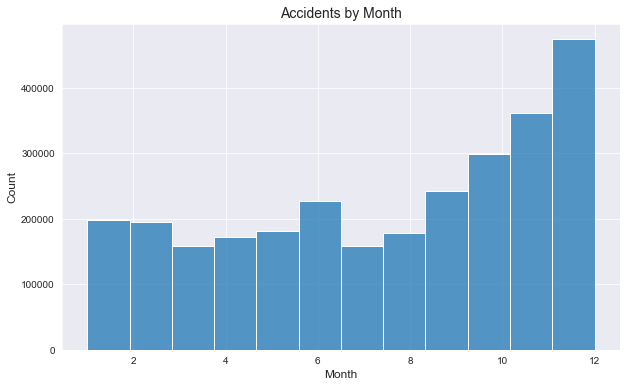

In [31]:
plt.figure(figsize=(10,6))
ax = sns.histplot(us_accidents_df.Start_Time.dt.month, bins=12, kde=False)
plt.title('Accidents by Month', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

The percentage of accidents increases exponentially with each month. March seems to have the lowest percentage. There is a huge spike between October and December accidents, with December being the highest. This could be because of the festive season, and winter.

### Roads

<Figure size 576x432 with 0 Axes>

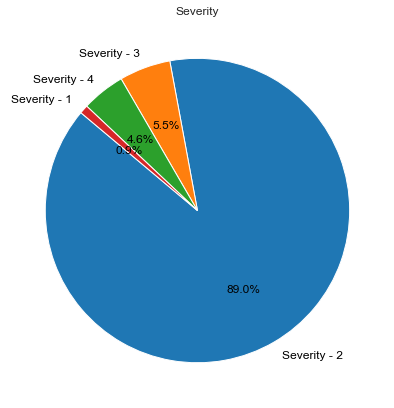

In [156]:
accidents_severity = us_accidents_df.Severity.value_counts()
ax = plt.figure(figsize=(8, 6))

severity_label = ['Severity - 2', "Severity - 3", 'Severity - 4','Severity - 1']

fig = plt.figure(figsize =(10, 7))
plt.pie(accidents_severity, labels = severity_label, autopct='%1.1f%%',startangle=140, textprops={'fontsize': 12, 'weight': 'normal', 'color': 'black'})
plt.title(label="Severity",
          loc="center",
          fontstyle='normal')
plt.show()


**Severity.**

Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay). 89% of the accidents had a moderate level 2 severity on traffic, while 0.9% had a level 1 severity.

In [157]:
us_accidents_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Text(0, 0.5, 'Side')

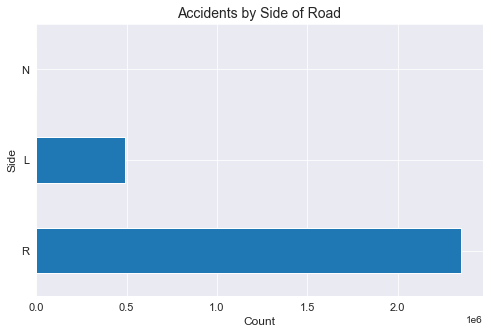

In [162]:
accidents_by_side = us_accidents_df.Side.value_counts()
accidents_by_side.plot(kind='barh', figsize=(8,5), fontsize =11)
plt.title('Accidents by Side of Road', fontsize = 14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Side', fontsize=12)

Cars in the US are driven on the right side of the road. The percentage of accidents occurence is higher on the right side than on the left side. This could be due to head on collisions.

**Bump**

A POI annotation which indicates presence of speed bump or hump in a nearby location.

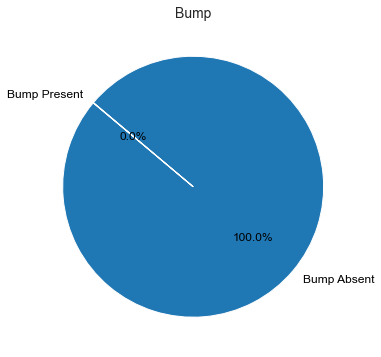

In [175]:
accidents_by_bump = us_accidents_df.Bump.value_counts()

bump_label = ['Bump Absent', "Bump Present"]

plt.figure(figsize =(6, 6))
plt.pie(accidents_by_bump, labels = bump_label, autopct='%1.1f%%',startangle=140, textprops={'fontsize': 12, 'weight': 'normal', 'color': 'black'})
plt.title(label="Bump",
          loc="center",
          fontstyle='normal', fontsize = 14)
plt.show()

In 100% of the accidents, bumps or humps were not present in the location or nearby location. This tells us that bumps / humps play a very key role in accidents prevention in the US, from the report.

Text(0, 0.5, 'Count')

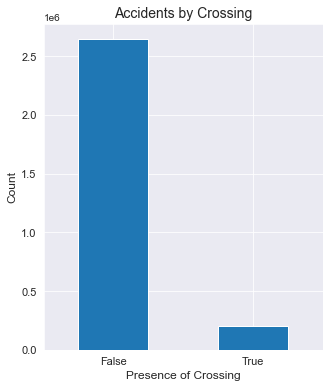

In [188]:
accidents_by_crossing = us_accidents_df.Crossing.value_counts()
accidents_by_crossing.plot(kind='bar', figsize=(5,6), fontsize =11)
plt.title('Accidents by Crossing', fontsize = 14)
plt.xticks(rotation=0)
plt.xlabel('Presence of Crossing', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [202]:
accidents_by_crossing  * 100 / accidents_by_crossing.sum()

False    92.963517
True      7.036483
Name: Crossing, dtype: float64

The percentage of accidents is 93% in areas without crossing, while it is 7% in areas with crossing. Having a crossing in a nearby location can help prevent accidents by up to 93%